In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD
layers=keras.layers
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns;

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv('/content/drive/My Drive/Suicide Prediction/master.csv') 
df.head()

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers


In [ ]:
df.info()

In [ ]:
#renaming the columns
df.columns=['country','year','gender','age_group','suicide_number','population','sui_pop','country_year','hdi','gdp_for_year','gdp_per_capita','generation']
df.head()

,country,year,gender,age_group,suicide_number,population,sui_pop,country_year,hdi,gdp_for_year,gdp_per_capita,generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers


# Data visualization

In [ ]:
## Number of suicides in 1985
year_1985 = df[(df['year'] == 1985)]
year_1985 = year_1985.groupby('country')[['suicide_number']].sum().reset_index()

## Sorting values in ascending order
year_1985 = year_1985.sort_values(by='suicide_number', ascending=False)

## Styling output dataframe
year_1985.style.background_gradient(cmap='Purples', subset=['suicide_number'])

,country,suicide_number
46,United States,29446
24,Japan,23257
16,France,12501
41,Sri Lanka,5668
45,United Kingdom,5105
22,Italy,4759
8,Brazil,4228
36,Republic of Korea,3689
10,Canada,3258
43,Thailand,2982


In [ ]:
#Number of suicides in 2015
year_2015 = df[(df['year'] == 2015)]
year_2015 = year_2015.groupby('country')[['suicide_number']].sum().reset_index()

# Sort values in ascending order
year_2015 = year_2015.sort_values(by='suicide_number', ascending=False)

# Styling output dataframe
year_2015.style.background_gradient(cmap='Oranges', subset=['suicide_number'])

,country,suicide_number
60,98,44189
45,75,25432
27,46,23092
43,73,13510
7,15,11163
19,35,10088
58,95,7574
35,58,6234
40,69,5420
59,97,4910


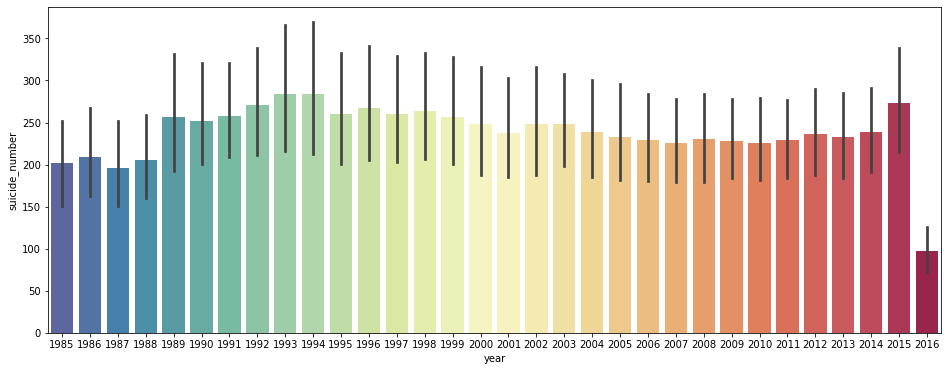

In [ ]:
## Suicides number by year
f,ax = plt.subplots(1,1,figsize=(16,6))
ax = sns.barplot(x = df['year'], y = 'suicide_number',
                data=df, palette='Spectral_r')

(array([0, 1, 2, 3, 4, 5]), <a list of 6 Text major ticklabel objects>)

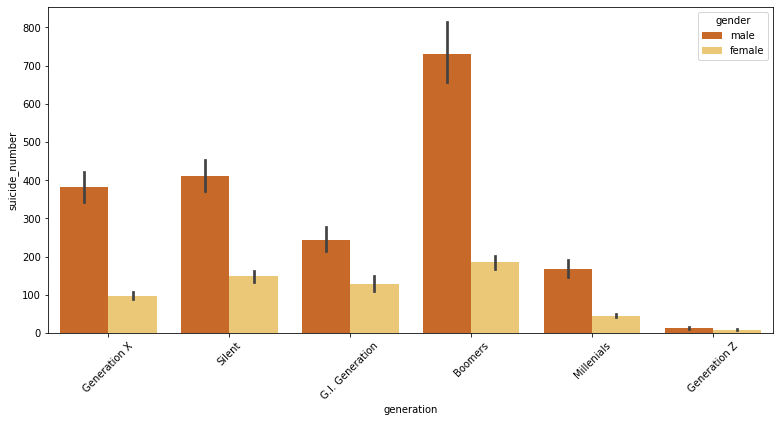

In [ ]:
## Suicides number by generation and gender
f,ax = plt.subplots(1,1,figsize=(13,6))
ax = sns.barplot(x = df['generation'], y = 'suicide_number',
                  hue='gender',data=df, palette='YlOrBr_r')
plt.xticks(rotation=45)

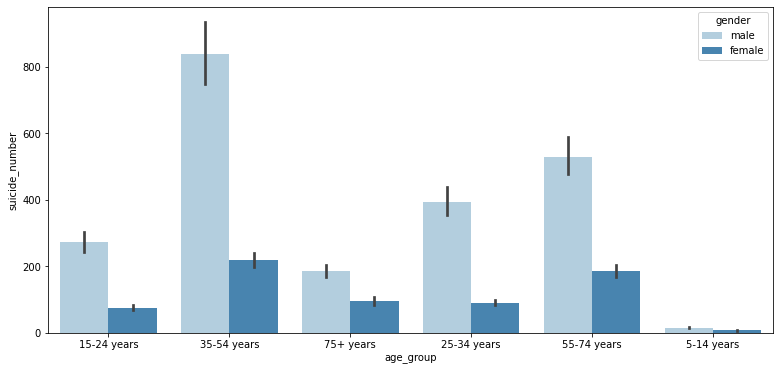

In [ ]:
## Suicides number by age and sex
f,ax = plt.subplots(1,1,figsize=(13,6))
ax = sns.barplot(x = df['age_group'], y = 'suicide_number',
                  hue='gender',data=df, palette='Blues')

<Figure size 720x720 with 0 Axes>

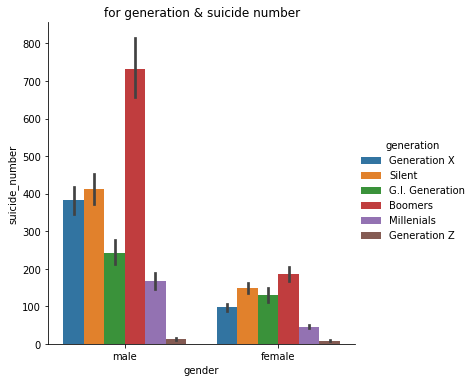

In [ ]:
plt.figure(figsize=(10,10))
sns.catplot(x="gender", y="suicide_number",
                 hue="generation",
                 data=df, kind="bar")
plt.title('for generation & suicide number')
plt.show()

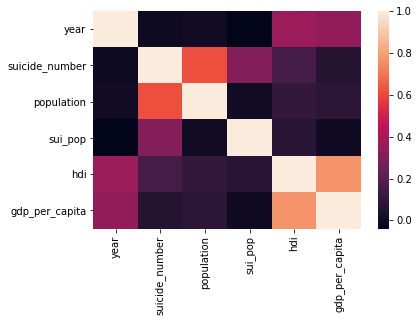

In [ ]:
corr = df.corr()
sns.heatmap(corr, xticklabels=corr.columns.values, yticklabels=corr.columns.values)

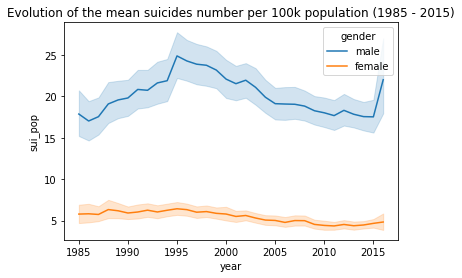

In [ ]:
## Mean suicides number by gender and 100k population
df1=df
data = df1.groupby(["year", "gender"]).agg("mean").reset_index()
sns.lineplot(x = "year", y = "sui_pop", hue = "gender", data = df1)
plt.title("Evolution of the mean suicides number per 100k population (1985 - 2015)");

Text(0.5, 0.98, 'Evolution of suicide by sex and age category (1985 - 2015)')

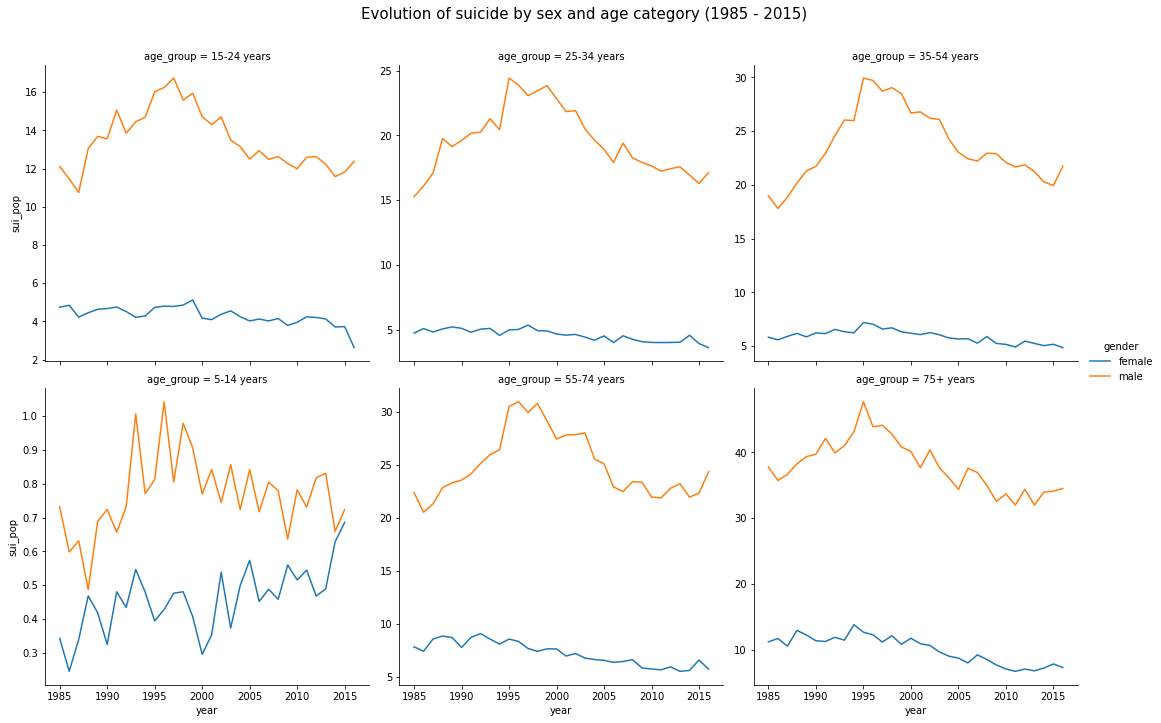

In [ ]:
df1 = df1.groupby(["year", "gender", "age_group"]).agg("mean").reset_index()

sns.relplot(x = "year", y = "sui_pop", 
            hue = "gender", col = "age_group", col_wrap = 3, data = df1, 
            facet_kws=dict(sharey=False), kind = "line")
plt.subplots_adjust(top = 0.9)
plt.suptitle("Evolution of suicide by sex and age category (1985 - 2015)", size=15)

In [ ]:
df.head()

,country,year,gender,age_group,suicide_number,population,sui_pop,country_year,hdi,gdp_for_year,gdp_per_capita,generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers


###Remove unnecessary columns

In [ ]:
#Remove unnecessary columns
df.drop(["country_year",'hdi','gdp_for_year'],axis=1,inplace=True)
df.head()
#country_year =>Redundant column
#hdi => many NAN values
#gdp_for_year  =>we keep gdp_per_capita

,country,year,gender,age_group,suicide_number,population,sui_pop,gdp_per_capita,generation
0,Albania,1987,male,15-24 years,21,312900,6.71,796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,796,Boomers


In [ ]:
df.age_group.unique()

array(['15-24 years', '35-54 years', '75+ years', '25-34 years',
       '55-74 years', '5-14 years'], dtype=object)

In [ ]:
#Gives the label to the age_group columns value  
df['age_group']=df['age_group'].replace(['15-24 years', '35-54 years', '75+ years', '25-34 years',
       '55-74 years', '5-14 years'],['youth','early adult','senior','young adult','adult','child'])  
df.head()

,country,year,gender,age_group,suicide_number,population,sui_pop,gdp_per_capita,generation
0,Albania,1987,male,youth,21,312900,6.71,796,Generation X
1,Albania,1987,male,early adult,16,308000,5.19,796,Silent
2,Albania,1987,female,youth,14,289700,4.83,796,Generation X
3,Albania,1987,male,senior,1,21800,4.59,796,G.I. Generation
4,Albania,1987,male,young adult,9,274300,3.28,796,Boomers


In [ ]:
df.country.unique()

In [ ]:
df.dtypes

country            object
year                int64
gender             object
age_group          object
suicide_number      int64
population          int64
sui_pop           float64
gdp_per_capita      int64
generation         object
dtype: object

# Encode the necessary columns

In [ ]:
le=LabelEncoder()
df.gender=le.fit_transform(df.gender)
df.age_group=le.fit_transform(df.age_group)
df.generation=le.fit_transform(df.generation)
df.country=le.fit_transform(df.country)
df.head()

,country,year,gender,age_group,suicide_number,population,sui_pop,gdp_per_capita,generation
0,0,1987,1,5,21,312900,6.71,796,2
1,0,1987,1,2,16,308000,5.19,796,5
2,0,1987,0,5,14,289700,4.83,796,2
3,0,1987,1,3,1,21800,4.59,796,1
4,0,1987,1,4,9,274300,3.28,796,0


## Separate the data into features and target variables

Standardize features by removing the mean and scaling to unit variance

The standard score of a sample x is calculated as:

z = (x - u) / s

where u is the mean of the training samples and s is the standard deviation of the training samples.

In [ ]:
X=df.drop(labels=['suicide_number'],axis=1)
y=df['suicide_number']
X = StandardScaler().fit_transform(X)
y = StandardScaler().fit_transform(y.values.reshape(-1, 1))

## Spliting the data into training and testing set

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4)

## Create DNN model
Model:

Here we have used keras Sequential model. It is a stack of layers where each layer has exacexactly one input and one output layer.

Activation function:

Activation function is use to decides, wheter a neuron should be activated or not by calculating weighted sum and further adding bias with it.




1) ReLU: Here we have use Rectified linear activation function(ReLU) in input 
layer and in hidding layers. The rectified linear activation function is a simple calculation that returns the value provided as input directly, or the value 0.0 if the input is 0.0 or less.

  Equation:
   A(x) = max(0,x).
   where X is input.

2) Linear: Here we have use linear activation function in output layer of the model. 

  Equation:
   A(x)=mX
   where m is constant.

In [ ]:
#define the keras model
model=Sequential()
model.add(Dense(50,input_dim=8, activation='relu'))
model.add(Dense(35,activation='relu'))
model.add(Dense(20,activation='relu'))
model.add(Dense(14,activation='relu'))
model.add(Dense(8,activation='relu'))
model.add(Dense(5,activation='relu'))
model.add(Dense(1,activation='linear'))

### Compilation of model
Loss function: Loss function is use to estimate the loss of the model so that the weights can be updated to reduce the loss on the next evaluation.

MSE:

Here we have use mean squared error as loss function. It is the defult loss to use for regression problems.

Mean squared error is calculated as the average of the squared differences between the predicted and actual values.The result is always positive regardless of the sign of the predicted and actual values and a perfect value is 0.0. 

In [ ]:
#compile the keras model
model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mse'])

###Fit the model

In [ ]:
 history=model.fit(X_train,y_train,epochs=100,
                      validation_data=(X_test, y_test),
                      verbose=0)

###Evaluate the model

In [ ]:
# evaluate the model
_,mse_train_dnn = model.evaluate(X_train, y_train, verbose=0)
_,mse_test_dnn = model.evaluate(X_test, y_test, verbose=0)
print("DNN - MSE of the test set  is : " + str(mse_test_dnn))
print("DNN - MSE of the training set is : "+str(mse_train_dnn))

DNN - MSE of the test set  is : 0.002554729813709855
DNN - MSE of the training set is : 0.0018819167744368315


###Trying Linear Regression

In [ ]:
from sklearn.linear_model import LinearRegression 
lr=LinearRegression()
lr.fit(X_train,y_train)
y_pred_test=lr.predict(X_test)
y_pred_train=lr.predict(X_train)

In [ ]:
#evaluate the model
from sklearn.metrics import mean_squared_error
mse_test_lr=mean_squared_error(y_test,y_pred_test)
mse_train_lr=mean_squared_error(y_train,y_pred_train)

print("Linear Regression - MSE of the test set  is : " + str(mse_test_lr))
print("Linear Regression - MSE of the training set is : "+str(mse_train_lr))

Linear Regression - MSE of the test set  is : 0.5731935291027239
Linear Regression - MSE of the training set is : 0.4969264049768335


###Trying Decision Tree Regression 

In [ ]:
from sklearn.tree import DecisionTreeRegressor
dtr=DecisionTreeRegressor()
dtr.fit(X_train,y_train)
y_pred_test=dtr.predict(X_test)
y_pred_train=dtr.predict(X_train)

In [ ]:
#evaluate the model
mse_test_dtr=mean_squared_error(y_test,y_pred_test)
mse_train_dtr=mean_squared_error(y_train,y_pred_train)

print("Decision Tree Regression - MSE of the test set is : " + str(mse_test_dtr))
print("Decision Tree Regression - MSE of the training set is : "+str(mse_train_dtr))

Decision Tree Regression - MSE of the test set is : 0.008032966549333227
Decision Tree Regression - MSE of the training set is : 3.285644434244467e-09


###Comparision of models

In [ ]:
train_error=[mse_train_dnn,mse_train_lr,mse_train_dtr]
test_error=[mse_test_dnn,mse_test_lr,mse_test_dtr]

col={'Train Error':train_error,'Test Error':test_error}
models=['DNN','Linear Regression','Decision Tree Regression']
comp=pd.DataFrame(data=col,index=models)
comp

,Train Error,Test Error
DNN,1.881917e-03,0.002555
Linear Regression,4.969264e-01,0.573194
Decision Tree Regression,3.285644e-09,0.008033


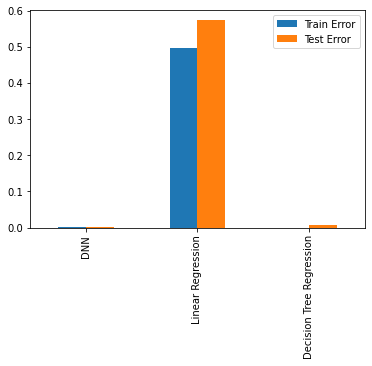

In [ ]:
comp.plot(kind='bar')